In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction

# Stochastic Gradient Descent

A popular alternative to the batch gradient descent algorithm is stochastic gradient descent (SGD), which is sometimes also called iterative or online gradient descent. Instead of updating the weights based on the sum of the accumulated errors over all training examples, x :
$$
   \Delta w_{j} = \eta \times (y^{(i)} - \sigma (z^{(i)})) \times x^{(i)}_{i}
$$
$$
\Delta b = \eta \times (y^{(i)} - \sigma (z^{(i)}))
$$

Although SGD can be considered as an approximation of gradient descent, it typically reaches con- vergence much faster because of the more frequent weight updates. Since each gradient is calculated based on a single training example, the error surface is noisier than in gradient descent, which can also have the advantage that SGD can escape shallow local minima more readily if we are working with nonlinear loss functions

Another advantage of SGD is that we can use it for online learning. In online learning, our model is trained on the fly as new training data arrives. This is especially useful if we are accumulating large amounts of data, for example, customer data in web applications. Using online learning, the system can immediately adapt to changes, and the training data can be discarded after updating the model if storage space is an issue.

## Adjusting Learning rate during training
In SGD implementations, the fixed learning rate, 𝜂, is often replaced by an adaptive learning rate that decreases over time, for example:
$$
      \frac {c1}{numIterations + c2}
$$
where c1 and c2 are constants. Note that SGD does not reach the global loss minimum but an area very close to it. And using an adaptive learning rate, we can achieve further annealing to the loss minimum.


In [76]:
class AdalineSGD:

    """
    Parameters
    --------------
    lr: float
        Learning rate
    epochs: int
        Number of iterations to train on the data
    random_state: int 
        Random number generator seed for random weight
        initialization

    Attributes
    --------------
    w_ : 1d-array
        weights
    b_ : Scalar 
        bias
    """
    def __init__(self, lr = 0.01, epochs = 50, shuffle = True, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
        self.shuffle = shuffle
        self.w_initialized = False
        self.rgen = np.random.RandomState(self.random_state)
    
    def fit(self, X,y):
        self._weight_initialize(X.shape[1])
        self.losses_ = []
        for epoch in range(self.epochs):
            if(self.shuffle):
                X, y = self._shuffle(X,y)
            lossesPerEpoch = []
            for x, target in zip(X,y):
                loss = self._update_weights(x, target)
                lossesPerEpoch.append(loss)
            self.losses_.append(np.mean(lossesPerEpoch))
            
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights
        This is for online Training 
        """
        if not self.w_initialized:
            self._weight_initialize(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_)+ self.b_
    
    def _update_weights(self,x,y):
        z = self.net_input(x)
        z = self.activation(z)
        error = (y - z)
        self.w_ += self.lr * error * x
        self.b_ += self.lr * error
        loss = (error**2)
        return loss
    
    def _weight_initialize(self, shape):
         
         self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=shape)
         self.b_ = 0.0
         self.w_initialized = True
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def activation(self, X):
        return X

    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.5, 1,0)
        


In [77]:
# get the iris data from uci
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [78]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [79]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

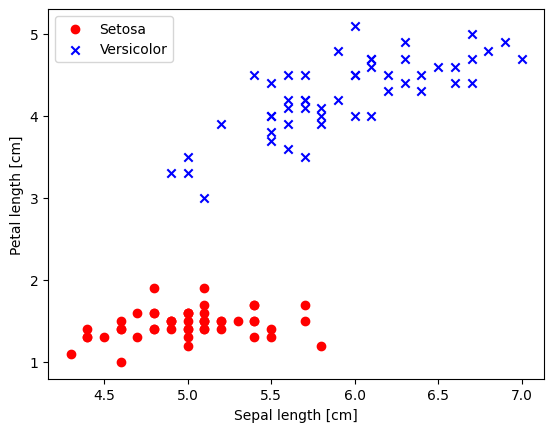

In [80]:
# extract only the setosa and versicolor  //the first 50 are setosa and next fifty are versiColor
y  = df.iloc[0:100, 4].values
y = np.where(y=="Iris-setosa", 0, 1)
X = df.iloc[0:100, [0,2]].values

#plot them
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [81]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

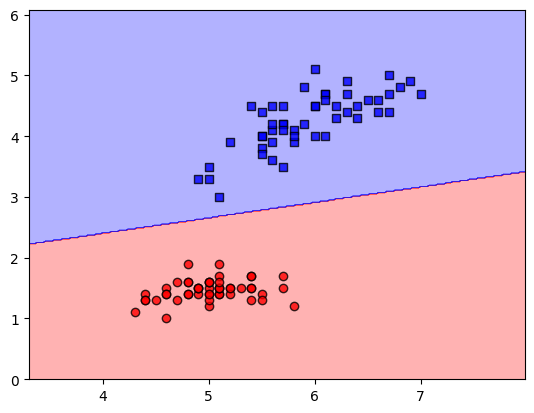

In [86]:
#taking an ideal learning rate
ada3 = AdalineSGD(lr=0.01, epochs=20)
ada3.fit(X,y)
plot_decision_regions(X, y, classifier=ada3)



Text(0.5, 1.0, 'Adaline - Learning rate 0.01')

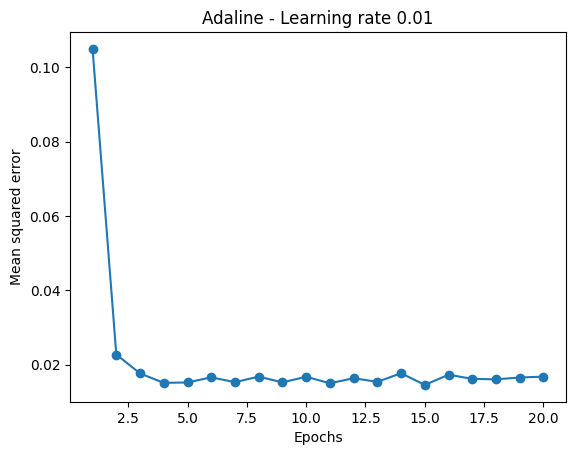

In [87]:
plt.plot(range(1, len(ada3.losses_) + 1),
ada3.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.title('Adaline - Learning rate 0.01')

## We will use a feature scaling method called standardization. 
This normalization procedure helps gradient descent learning to converge more quickly.
The equation is as follows:
$$
x_{j}' = \frac{{x_{j} - u_{j}}}{{\mu_{j}}}
$$

One of the reasons why standardization helps with gradient descent learning is that it is easier to find a learning rate that works well for all weights (and the bias). If the features are on vastly different scales, a learning rate that works well for updating one weight might be too large or too small to update the other weight equally well. Overall, using standardized features can stabilize the training such that the optimizer has to go through fewer steps to find a good or optimal solution (the global loss minimum).

In [88]:
# Standardize the inputs
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()


In [89]:
ada_gd = AdalineSGD(lr=0.01, epochs=20)
ada_gd.fit(X_std,y)

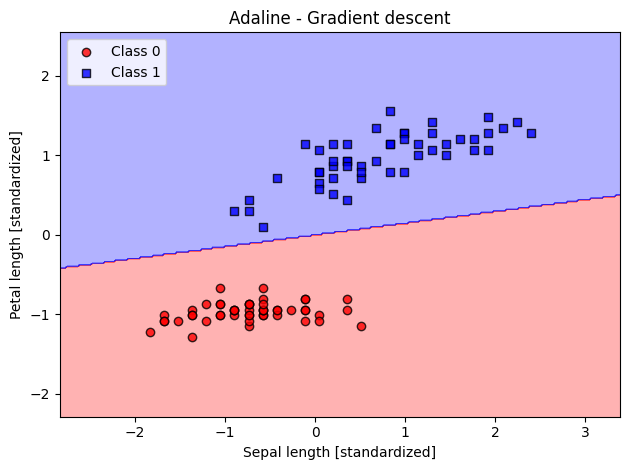

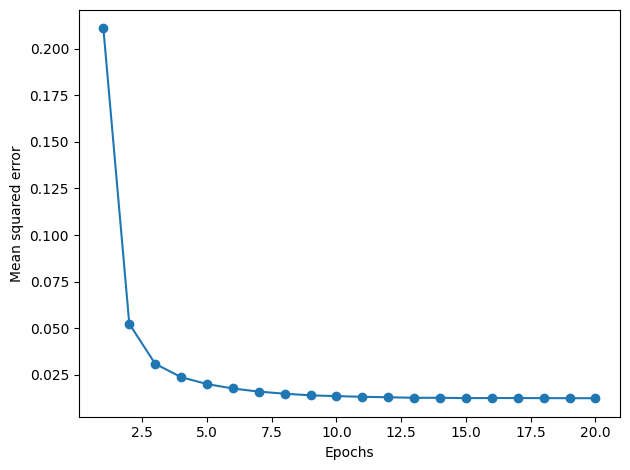

In [90]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In conclusion, We can observe that it takes lesser epochs to converge to the global minima when we apply standard minimization